<a href="https://colab.research.google.com/github/Hoa20146128/AI_FinalProject/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Final Project/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 347 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'Jackets': 0, 'Pants': 1, 'Shoes': 2, 'T-shirts': 3}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size) 
history=model.fit(training_set,epochs=100,batch_size=32)

# history = model.fit_generator(training_set,steps_per_epoch=3800//10,epochs=100,validation_steps=2200//10)

Epoch 1/100
11/11 [==============================] - 138s 13s/step - loss: 5.2401 - accuracy: 0.2133
Epoch 2/100
11/11 [==============================] - 62s 6s/step - loss: 1.3827 - accuracy: 0.2767
Epoch 3/100
11/11 [==============================] - 62s 6s/step - loss: 1.3275 - accuracy: 0.3343
Epoch 4/100
11/11 [==============================] - 62s 6s/step - loss: 1.1873 - accuracy: 0.4726
Epoch 5/100
11/11 [==============================] - 65s 6s/step - loss: 1.0241 - accuracy: 0.5620
Epoch 6/100
11/11 [==============================] - 63s 6s/step - loss: 0.9721 - accuracy: 0.6138
Epoch 7/100
11/11 [==============================] - 68s 6s/step - loss: 0.8507 - accuracy: 0.6369
Epoch 8/100
11/11 [==============================] - 62s 6s/step - loss: 0.8166 - accuracy: 0.6772
Epoch 9/100
11/11 [==============================] - 62s 6s/step - loss: 0.7481 - accuracy: 0.6888
Epoch 10/100
11/11 [==============================] - 65s 6s/step - loss: 0.7089 - accuracy: 0.7233
Epoch 1

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.022612016648054123
Train Accuracy 0.9913544654846191


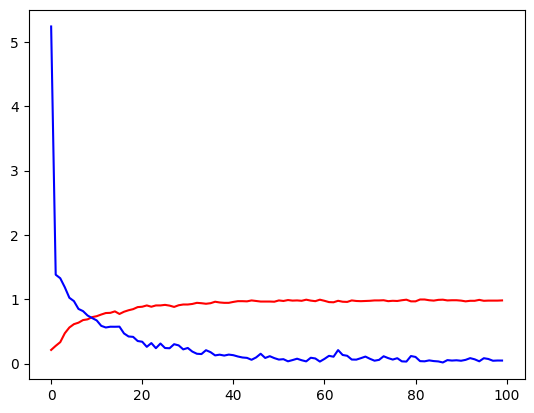

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'r', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [ ]:
# Lưu lại
model.save("fashion.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model("fashion.h5")

In [ ]:
model.save('/content/drive/MyDrive/AI/Final Project/fashion.h5')